In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card/best-techniques-and-metrics-for-imbalanced-dataset
/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [153]:
from matplotlib import pyplot as plt
import seaborn as sns

In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
from scipy.stats import skew
from sklearn import metrics
from collections import Counter

In [155]:
raw_df = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
raw_df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [156]:
raw_df.shape

(555719, 23)

In [157]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [158]:
raw_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [159]:
raw_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [160]:
raw_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


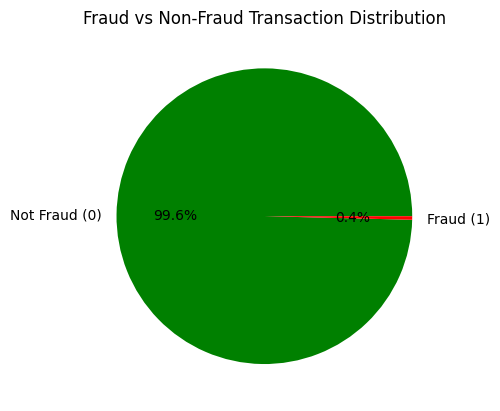

In [161]:
import matplotlib.pyplot as plt

no_of_ex = raw_df['is_fraud'].value_counts().to_list()
labels = ['Not Fraud (0)', 'Fraud (1)']

plt.pie(no_of_ex, labels=labels, colors=['green', 'red'], autopct='%1.1f%%')
plt.title("Fraud vs Non-Fraud Transaction Distribution")
plt.show()


In [162]:
df=raw_df.drop_duplicates()
df.shape

(555719, 23)

In [163]:
raw_df.shape
#no duplicates 
raw_df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [164]:
numeric_only = raw_df.select_dtypes(exclude=['object'])
numeric_only.columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [165]:
categorical_only=raw_df.select_dtypes(include=['object'])
categorical_only.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [166]:
#category encoding and seperating obj from int and float 
raw_df["trans_date_trans_time"].value_counts().head(10)

trans_date_trans_time
2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
2020-12-12 02:47:10    3
2020-12-07 16:13:36    3
2020-09-15 00:07:37    3
2020-12-14 23:47:36    3
2020-12-07 13:35:07    3
Name: count, dtype: int64

In [167]:
df=raw_df.copy()

In [168]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date_trans_time'].value_counts()

trans_date_trans_time
2020-12-19 16:02:22    4
2020-12-13 17:53:47    4
2020-12-17 20:36:39    4
2020-10-05 19:37:49    4
2020-12-27 01:22:37    3
                      ..
2020-08-25 13:15:57    1
2020-08-25 13:15:37    1
2020-08-25 13:15:22    1
2020-08-25 13:15:12    1
2020-12-31 23:59:34    1
Name: count, Length: 544760, dtype: int64

In [169]:
df['year']=df['trans_date_trans_time'].dt.year
df['month']=df['trans_date_trans_time'].dt.month
df['day']=df['trans_date_trans_time'].dt.day
df['hour']=df['trans_date_trans_time'].dt.hour
df['weekday']=df['trans_date_trans_time'].dt.weekday
df['hour'].value_counts()

hour
23    28798
16    28563
22    28388
21    28205
14    28204
13    28178
17    28064
15    28048
12    28037
18    28001
20    27983
19    27925
1     18461
3     18199
0     18153
2     18140
6     18106
7     18098
11    18088
4     18075
10    18049
9     18046
8     17993
5     17917
Name: count, dtype: int64

In [170]:
df['time_bin']=pd.cut(df['hour'],bins=[0,6,12,18,24],labels=['Night','Morning','AfterNoon','Evening'])
df = pd.get_dummies(df, columns=['time_bin'], drop_first=True)
df.select_dtypes(include='object').columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [171]:
df.select_dtypes(include='object').columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [172]:
df.select_dtypes(exclude='object').columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'amt', 'zip', 'lat',
       'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'year', 'month', 'day', 'hour', 'weekday', 'time_bin_Morning',
       'time_bin_AfterNoon', 'time_bin_Evening'],
      dtype='object')

In [173]:
df['dob']=pd.to_datetime(df['dob'])
df['age']=df['year']-df['dob'].dt.year

In [174]:
df.dtypes.value_counts()

object            10
int64              6
int32              6
float64            5
bool               3
datetime64[ns]     2
Name: count, dtype: int64

In [175]:
numerical_df = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_df].apply(lambda x: skew(x.dropna()))

Unnamed: 0     0.000000
cc_num         2.849196
amt           37.133977
zip            0.077246
lat           -0.206037
long          -1.139413
city_pop       5.583400
unix_time     -0.077405
merch_lat     -0.202626
merch_long    -1.136806
is_fraud      16.002510
dtype: float64

In [176]:
columns_rightskew = ["amt", "city_pop"]
columns_leftskew = ["long", "lat", "merch_lat", "merch_long"]

In [177]:
for col in columns_rightskew:
    df[col + '_log'] = np.log1p(df[col])

for col in columns_leftskew:
    max_val = df[col].max()
    df[col + '_log'] = np.log1p(max_val + 1 - df[col])

In [178]:
transformed_cols = [col + '_log' for col in columns_rightskew + columns_leftskew]
for col in transformed_cols:
    print(f"{col} skew: {round(skew(df[col].dropna()), 2)}")

amt_log skew: -0.31
city_pop_log skew: 0.61
long_log skew: -0.38
lat_log skew: -2.78
merch_lat_log skew: -2.27
merch_long_log skew: -0.29


In [179]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal', random_state=42)
df[['lat_log_qt', 'merch_lat_log_qt']] = qt.fit_transform(df[['lat_log', 'merch_lat_log']])

In [180]:
df.shape

(555719, 40)

In [181]:
# correlation heatmap

In [182]:
df_tree=df.copy()
df_nontree=df.copy()

In [183]:
df_nontree.select_dtypes(include=['float64', 'int64']).columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'amt_log',
       'city_pop_log', 'long_log', 'lat_log', 'merch_lat_log',
       'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt'],
      dtype='object')

In [184]:
df_nontree.select_dtypes(exclude=['float64', 'int64']).columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num', 'year',
       'month', 'day', 'hour', 'weekday', 'time_bin_Morning',
       'time_bin_AfterNoon', 'time_bin_Evening', 'age'],
      dtype='object')

In [185]:
#higha cardinaltiy
df_nontree["job"].value_counts()
#df_nontree["city"].value_counts()
#df_nontree["street"].value_counts()

job
Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: count, Length: 478, dtype: int64

In [186]:
df_nontree.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening',
       'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log',
       'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt'],
      dtype='object')

In [187]:
high_card_cols = ['city', 'job']

for col in high_card_cols:
    freq_map = df_nontree[col].value_counts().to_dict()
    df_nontree[col + '_freq'] = df_nontree[col].map(freq_map)

# Optional: drop the original columns
#df_nontree.drop(columns=high_card_cols, inplace=True)
df_nontree.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening',
       'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log',
       'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt',
       'city_freq', 'job_freq'],
      dtype='object')

In [188]:
df_nontree['job_freq'].value_counts()

job_freq
1530    6120
2576    5152
2421    4842
4119    4119
3968    3968
        ... 
201      201
199      199
194      194
11        22
8          8
Name: count, Length: 383, dtype: int64

In [189]:
df_nontree['job_freq']

0         2430
1         2535
2         2587
3          663
4          891
          ... 
555714    1699
555715    1724
555716    2594
555717     883
555718    1090
Name: job_freq, Length: 555719, dtype: int64

In [190]:
df_nontree['job_bins'] = pd.cut(df_nontree['job_freq'],bins=[0, 2000, 4000, 6000],labels=["Rare", "Medium", "Common"])


In [191]:
job_encoded = pd.get_dummies(df_nontree['job_bins'], prefix='job')
df_nontree = pd.concat([df_nontree, job_encoded], axis=1)

In [192]:
df_nontree_copy=df_nontree.copy()

In [193]:
df_nontree.drop(columns=["job_freq","job_bins"],axis=1,inplace=True)

In [194]:
df_nontree.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening',
       'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log',
       'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt',
       'city_freq', 'job_Rare', 'job_Medium', 'job_Common'],
      dtype='object')

In [195]:
df_nontree["city"].value_counts()

city
Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
               ... 
Senatobia        10
Seattle           9
Guthrie           9
Rice              8
Wever             6
Name: count, Length: 849, dtype: int64

In [196]:
from scipy.stats import chi2_contingency
list=["city","street"]
for col in list:
    contingency = pd.crosstab(df_nontree[col], df_nontree['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"p value for {col}:{p}")

p value for city:0.0
p value for street:0.0


In [197]:
df_nontree["street_freq"]=df["street"].map(df["street"].value_counts())
df_nontree["street_freq"].value_counts()

street_freq
666    7326
882    4410
878    4390
671    4026
669    4014
       ... 
9        18
14       14
8         8
7         7
6         6
Name: count, Length: 393, dtype: int64

<Axes: ylabel='Frequency'>

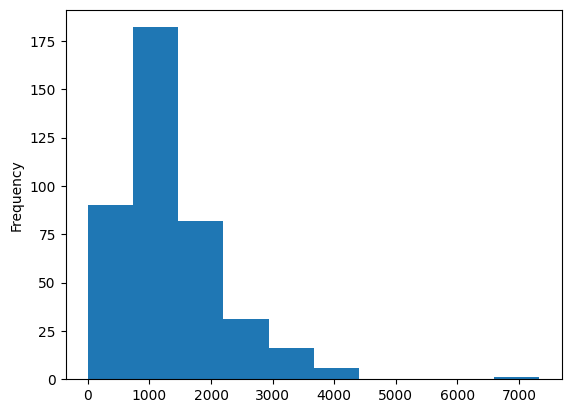

In [198]:
df_nontree['city_freq'].value_counts().sort_index().plot(kind='hist', bins=10)


<Axes: ylabel='Frequency'>

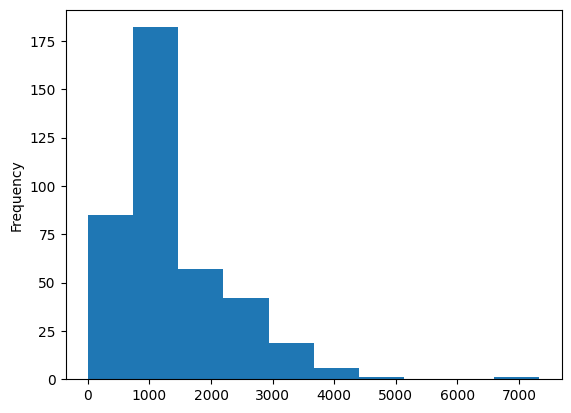

In [199]:
df_nontree['street_freq'].value_counts().sort_index().plot(kind='hist', bins=10)

In [200]:
df_nontree["street_bins"]=pd.cut(df_nontree["street_freq"],bins=[0,2000,3000,5000],labels=["Common","Medium","Rare"])

In [201]:
street_encoded=pd.get_dummies(df_nontree["street_bins"],prefix='street')
df_nontree=pd.concat([df_nontree,street_encoded],axis=1)

In [202]:
df_nontree["city_bins"]=pd.cut(df_nontree["city_freq"],bins=[0,2000,4000,7000],labels=["Common","Medium","Rare"])

In [203]:
city_encoded=pd.get_dummies(df_nontree["city_bins"],prefix='city')
df_nontree=pd.concat([df_nontree,city_encoded],axis=1)

In [204]:
df_nontree.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening',
       'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log',
       'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt',
       'city_freq', 'job_Rare', 'job_Medium', 'job_Common', 'street_freq',
       'street_bins', 'street_Common', 'street_Medium', 'street_Rare',
       'city_bins', 'city_Common', 'city_Medium', 'city_Rare'],
      dtype='object')

In [205]:
df_nontree_copy2=df_nontree.copy()

In [206]:
df_nontree.drop(columns=["city_freq","city_bins","street_freq","street_bins"],axis=1,inplace=True)

In [207]:
#df_nontree.drop(columns='city_bins')

In [208]:
nhypo=df_nontree.select_dtypes(include="object").columns.to_list()
for col in nhypo:
    contingency = pd.crosstab(df_nontree[col], df_nontree['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"p value for {col}:{p}")
    

p value for merchant:1.8022270460261968e-205
p value for category:0.0
p value for first:0.0
p value for last:0.0
p value for gender:0.5922844718406959
p value for street:0.0
p value for city:0.0
p value for state:6.739748689620309e-66
p value for job:0.0
p value for trans_num:0.4993693095753912


In [210]:
merchant_freq = df_nontree['merchant'].value_counts().to_dict()
df_nontree['merchant_freq'] = df_nontree['merchant'].map(merchant_freq)

<Axes: ylabel='Frequency'>

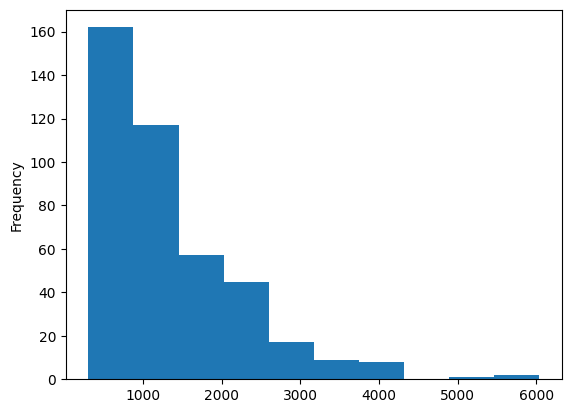

In [211]:
df_nontree['merchant_freq'].value_counts().sort_index().plot(kind='hist', bins=10)

In [212]:
df_nontree['merchant_bins'] = pd.cut(df_nontree['merchant_freq'],bins=[0, 2000, 4000, 7000],labels=[ 'Common', 'Medium','Rare'])


In [213]:
merchant_encoded = pd.get_dummies(df_nontree['merchant_bins'], prefix='merchant').astype(int)
df_nontree = pd.concat([df_nontree, merchant_encoded], axis=1)

In [214]:
state_freq = df_nontree['state'].value_counts().to_dict()
df_nontree['state_freq'] = df_nontree['state'].map(state_freq)

<Axes: ylabel='Frequency'>

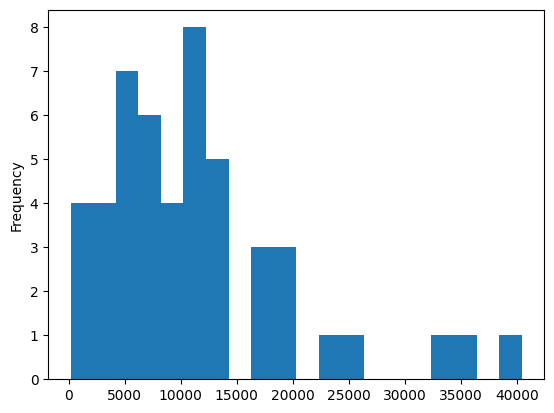

In [215]:
df_nontree["state_freq"].value_counts().sort_index().plot(kind='hist',bins=20)

In [216]:
df_nontree['state_bins'] = pd.cut(df_nontree['state_freq'],bins=[0, 10000, 25000, 40000],labels=[ 'Common', 'Medium','Rare'])


In [217]:
state_encoded = pd.get_dummies(df_nontree['state_bins'], prefix='state').astype(int)
df_nontree = pd.concat([df_nontree, state_encoded], axis=1)

In [218]:
df_nontree.drop(columns=['merchant_freq', 'merchant_bins', 'state_freq', 'state_bins'], inplace=True)


In [219]:
df_nontree.select_dtypes(include='object').columns

Index(['merchant', 'category', 'first', 'last', 'gender', 'street', 'city',
       'state', 'job', 'trans_num'],
      dtype='object')

In [220]:
df_nontree['category'].value_counts()

category
gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: count, dtype: int64

In [221]:
category_freq = df_nontree['category'].value_counts().to_dict()
df_nontree['category_freq'] = df_nontree['category'].map(category_freq)

<Axes: ylabel='Frequency'>

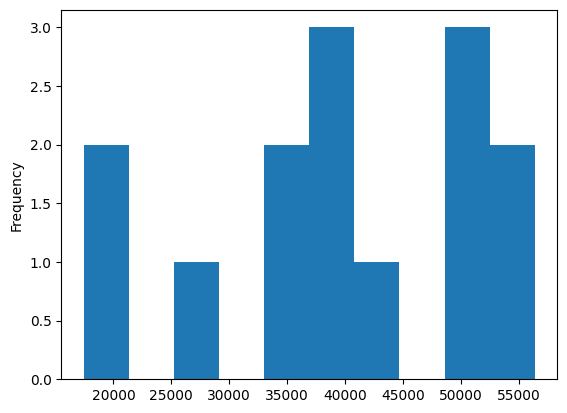

In [222]:
df_nontree['category_freq'].value_counts().sort_index().plot(kind='hist', bins=10)

In [223]:
df_nontree['category_bins'] = pd.cut(df_nontree['category_freq'],bins=[0, 30000, 45000, 60000],labels=['Rare', 'Medium', 'Common'])


In [224]:
category_encoded = pd.get_dummies(df_nontree['category_bins'], prefix='category').astype(int)
df_nontree = pd.concat([df_nontree, category_encoded], axis=1)


In [225]:
df_nontree.drop(['category_freq', 'category_bins'], axis=1, inplace=True)


In [226]:
list=df_nontree.select_dtypes(include='object').columns
df_nontree.drop(list,axis=1,inplace=True)

In [227]:
df_nontree.dtypes.value_counts()

int64             15
float64           13
bool              12
int32              6
datetime64[ns]     2
Name: count, dtype: int64

In [228]:
bool_cols = df_nontree.select_dtypes(include='bool').columns
df_nontree[bool_cols] = df_nontree[bool_cols].astype('int64')


In [229]:
int32_cols = df_nontree.select_dtypes(include='int32').columns
df_nontree[int32_cols] = df_nontree[int32_cols].astype('int64')


In [230]:
bool_cols = df_nontree.select_dtypes(include='datetime64[ns]').columns
df_nontree.drop(bool_cols,axis=1,inplace=True)

In [231]:
df_nontree.dtypes.value_counts()

int64      33
float64    13
Name: count, dtype: int64

In [232]:
df_nontree['is_fraud'].value_counts(normalize=True)*100

is_fraud
0    99.614014
1     0.385986
Name: proportion, dtype: float64

In [233]:
df_nontree.columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month',
       'day', 'hour', 'weekday', 'time_bin_Morning', 'time_bin_AfterNoon',
       'time_bin_Evening', 'age', 'amt_log', 'city_pop_log', 'long_log',
       'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt',
       'merch_lat_log_qt', 'job_Rare', 'job_Medium', 'job_Common',
       'street_Common', 'street_Medium', 'street_Rare', 'city_Common',
       'city_Medium', 'city_Rare', 'merchant_Common', 'merchant_Medium',
       'merchant_Rare', 'state_Common', 'state_Medium', 'state_Rare',
       'category_Rare', 'category_Medium', 'category_Common'],
      dtype='object')

<Axes: xlabel='is_fraud', ylabel='count'>

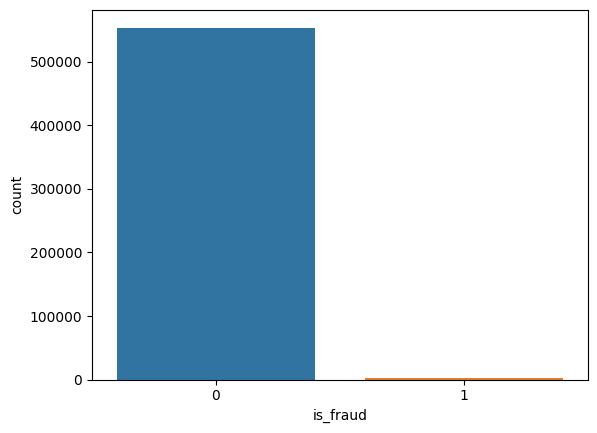

In [234]:
sns.countplot(x='is_fraud',data=df_nontree)

In [235]:
df_nontree.columns.value_counts().sum()

46

In [236]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour',
       'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening',
       'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log',
       'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt'],
      dtype='object')

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


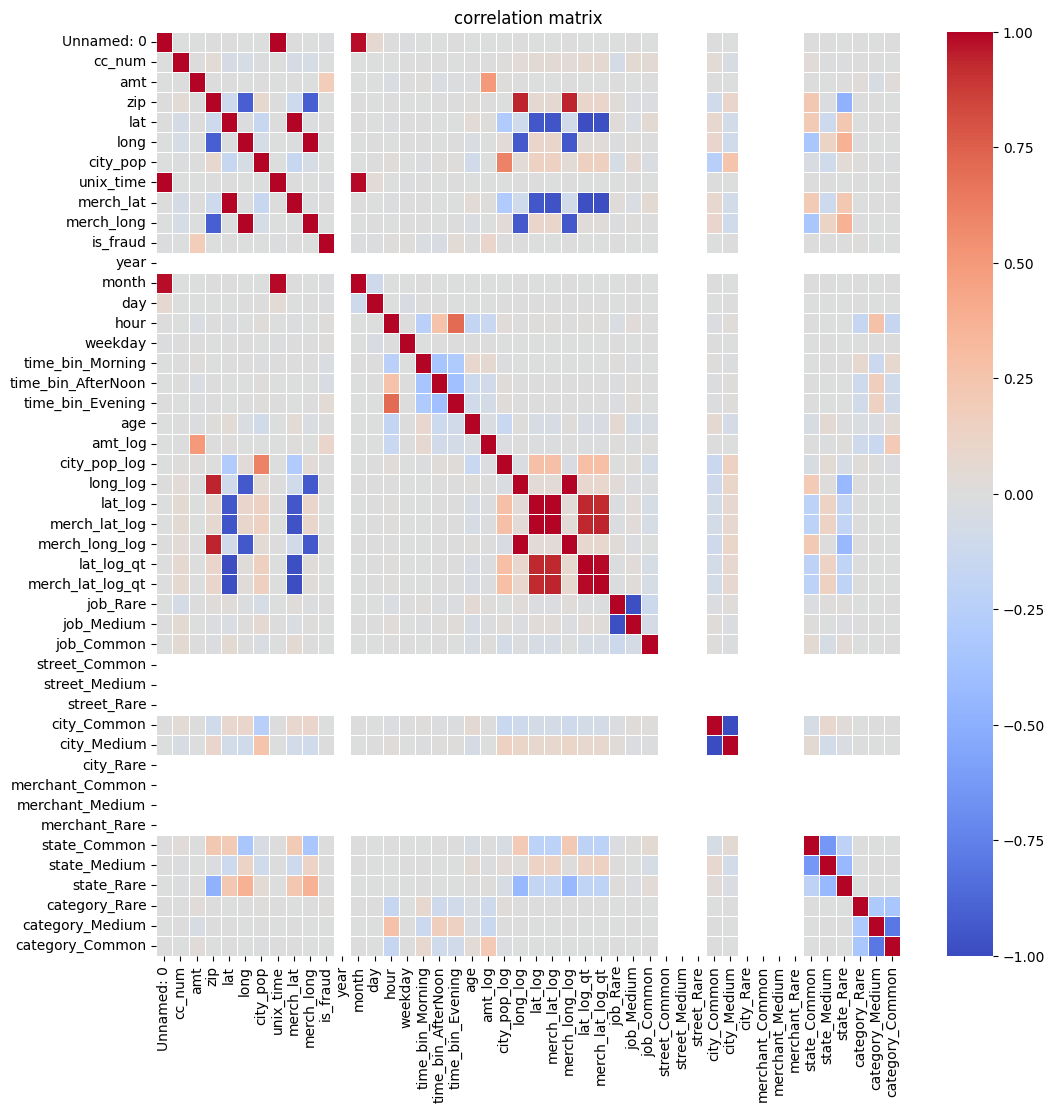

In [237]:
#correlation
plt.figure(figsize=(12,12))
correlation=df_nontree.corr()
sns.heatmap(correlation,annot=False,cmap='coolwarm',linewidth=0.5)
plt.title('correlation matrix')
plt.show()

In [238]:
corr_matrix = df_nontree.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated columns to drop:", to_drop)


Highly correlated columns to drop: ['long', 'unix_time', 'merch_lat', 'merch_long', 'month', 'long_log', 'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt', 'job_Medium', 'city_Medium']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [239]:
df_nontree['zip'].value_counts()

zip
82514    1589
48088    1518
34112    1495
16114    1474
73754    1470
         ... 
38668      10
98118       9
73044       9
56367       8
52658       6
Name: count, Length: 912, dtype: int64

In [240]:
df_nontree['city_Medium'].value_counts()

city_Medium
0    544459
1     11260
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


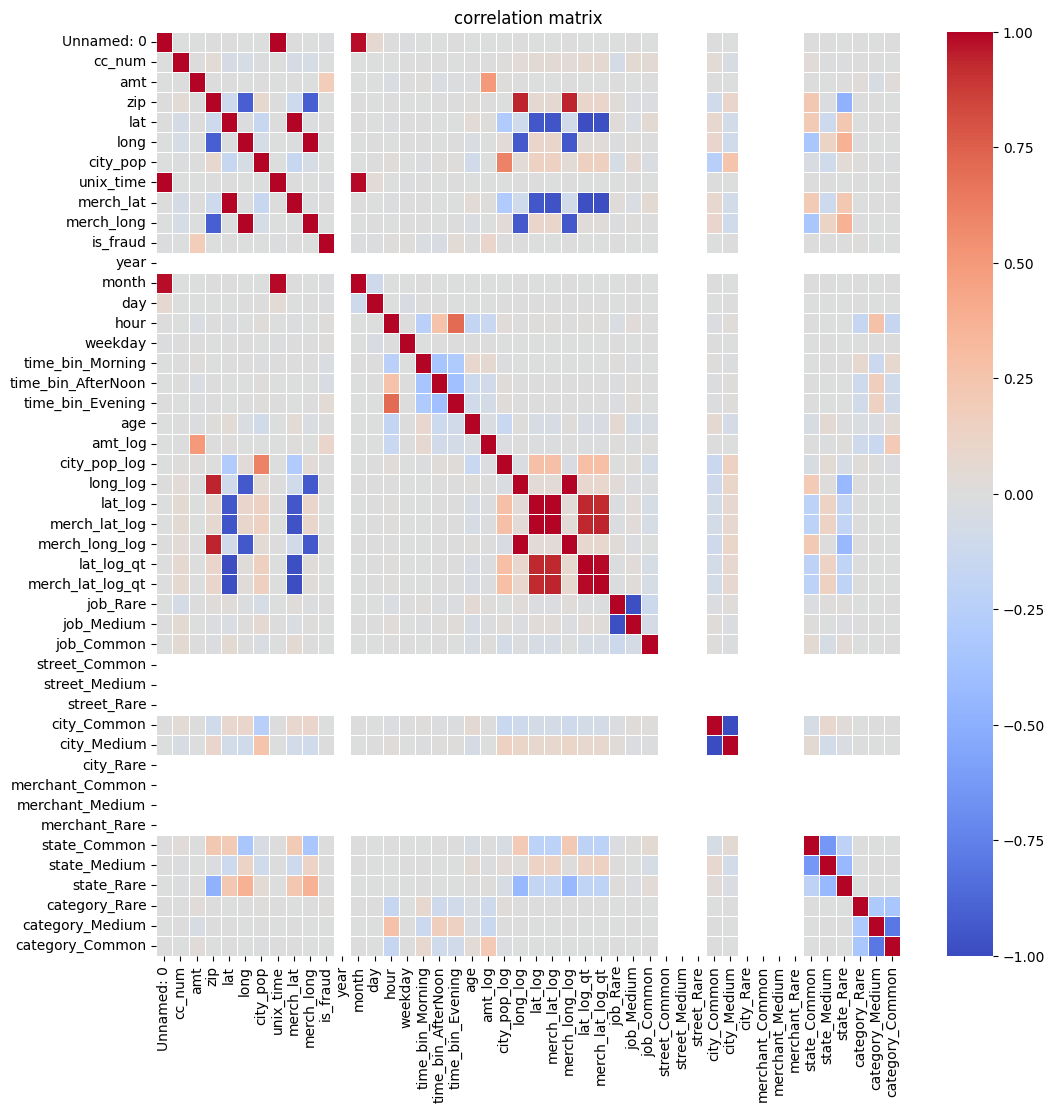

In [241]:
#correlation
plt.figure(figsize=(12,12))
correlation=df_nontree.corr()
sns.heatmap(correlation,annot=False,cmap='coolwarm',linewidth=0.5)
plt.title('correlation matrix')
plt.show()

In [242]:
df_nontree['minute'] = df['trans_date_trans_time'].dt.minute

<Axes: xlabel='hour', ylabel='is_fraud'>

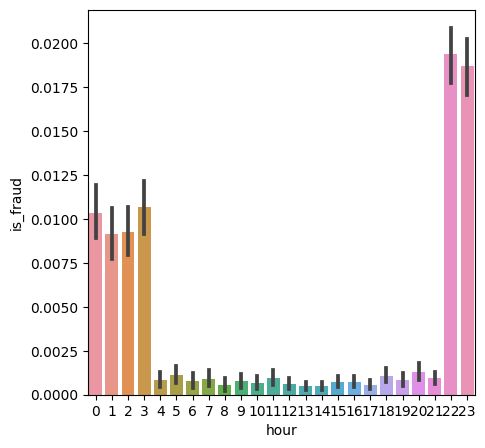

In [243]:
plt.figure(figsize=(5,5))
sns.barplot(x='hour',y='is_fraud',data=df_nontree)

<Axes: xlabel='is_fraud', ylabel='age'>

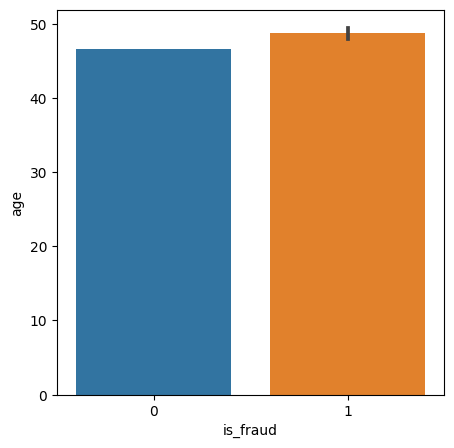

In [244]:
plt.figure(figsize=(5,5))
sns.barplot(x='is_fraud',y='age',data=df_nontree)

<Axes: ylabel='Frequency'>

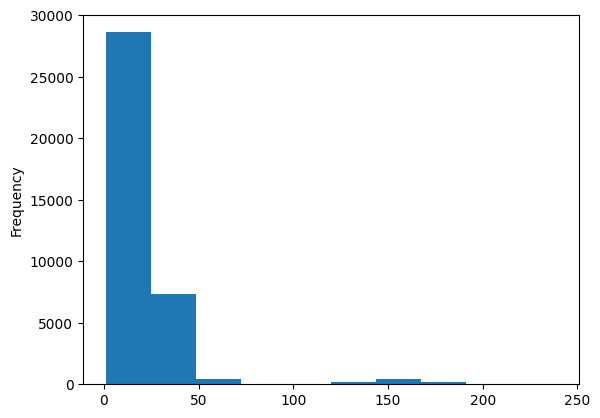

In [245]:
df_nontree['amt'].value_counts().sort_index().plot(kind='hist', bins=10)

In [285]:
df_nontree['amt_bin']=pd.cut(df_nontree['amt'],bins=[0, 100, 500, 1000, 2000])

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='amt_bin', ylabel='is_fraud'>

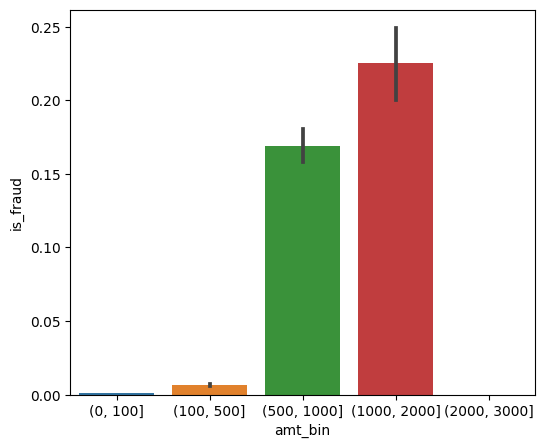

In [283]:
plt.figure(figsize=(6,5))
sns.barplot(x='amt_bin', y='is_fraud', data=df_nontree, estimator=lambda x: sum(x)/len(x))

In [248]:
df_nontree['age_bin'] = pd.cut(df_nontree['age'],bins=[0, 25, 40, 60, 100],labels=['<25', '25–40', '40–60', '60+'])

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='age_bin', ylabel='is_fraud'>

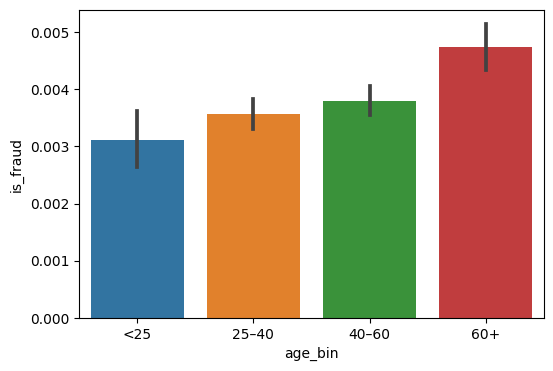

In [249]:
plt.figure(figsize=(6,4))
sns.barplot(x='age_bin', y='is_fraud', data=df_nontree, estimator=lambda x: sum(x)/len(x))


<Axes: ylabel='Frequency'>

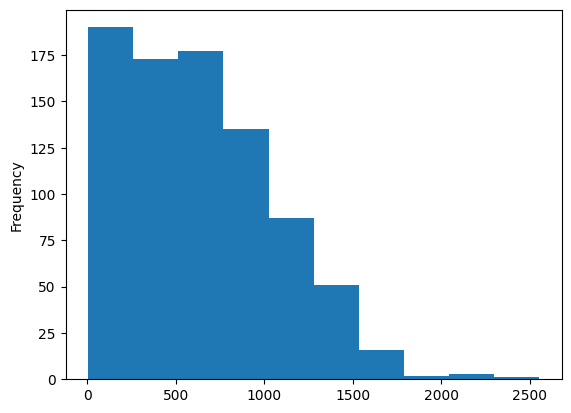

In [250]:
df_nontree['city_pop'].value_counts().sort_index().plot(kind='hist',bins=10)

In [251]:
from math import radians, cos, sin, asin, sqrt

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Haversine formula
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))

    # Radius of Earth in kilometers
    km = 6371 * c
    return km


In [252]:
df_nontree['distance_user_merchant'] = df_nontree.apply(
    lambda row: haversine(row['lat'], row['long'], row['merch_lat'], row['merch_long']),
    axis=1
)


In [253]:
df_nontree['city_size_bin'] = pd.cut(df_nontree['city_pop'],bins=[0, 1000, 2000, df_nontree['city_pop'].max()], labels=['Small', 'Medium', 'Large']
)


In [254]:
risk_map = {'Small': 1, 'Large': 2, 'Medium': 3} 
df_nontree['city_risk_score'] = df_nontree['city_size_bin'].map(risk_map)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='city_size_bin', ylabel='is_fraud'>

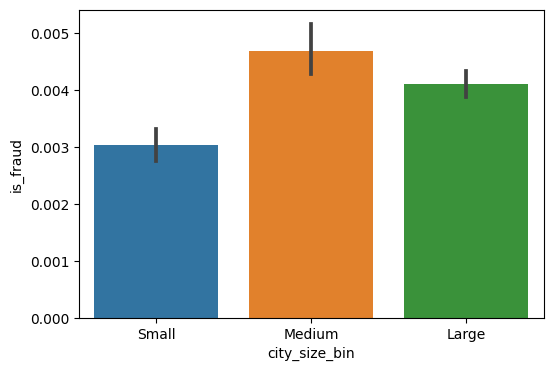

In [255]:
plt.figure(figsize=(6,4))
sns.barplot(x='city_size_bin', y='is_fraud', data=df_nontree, estimator=lambda x: sum(x)/len(x))


In [256]:
df_nontree['date']=df['trans_date_trans_time'].dt.date
df_nontree.sort_values(by=['cc_num', 'date'], inplace=True)


In [257]:
df_nontree['date'] = pd.to_datetime(df_nontree['date'])
df_nontree['date'].dtype


dtype('<M8[ns]')

In [258]:
df_nontree['merchant']=df['merchant']

In [259]:
df_nontree['merchant']

157                          fraud_Kutch-Ferry
741                      fraud_Halvorson Group
3047                  fraud_Conroy-Cruickshank
4351                          fraud_Larkin Ltd
7695                     fraud_Leffler-Goldner
                          ...                 
552584                 fraud_Parisian and Sons
552892                 fraud_Bogisich-Homenick
553559                  fraud_Erdman-Kertzmann
553560                     fraud_Stracke-Lemke
553883    fraud_Roberts, Daniel and Macejkovic
Name: merchant, Length: 555719, dtype: object

In [260]:
df_nontree_copy3=df_nontree.copy()

In [261]:
def feature_engineering(df):
    df = df.copy()
    df['is_trans_night'] = ((df['hour'] >= 22) | (df['hour'] <= 4)).astype(int)
    df['high_amt'] = (df['amt'] > 500).astype(int)
    df['high_amt_night'] = ((df['is_trans_night'] == 1) & (df['amt'] > 500)).astype(int)
    df['hourly_txn_count'] = df.groupby(['cc_num', 'hour'])['Unnamed: 0'].transform('count')
    df['sudden_burst'] = ((df['min_txn_count'] >= 3) | (df['hourly_txn_count'] >= 10)).astype(int)
    df['senior_risk_night'] = ((df['is_trans_night'] == 1) & (df['amt'] > 500) & (df['age'] > 60)).astype(int)
    df['amt_night_interaction'] = df['amt'] * df['is_trans_night']
    df['is_merchant_unique'] = ~df.duplicated(subset=['cc_num', 'merchant'], keep=False)
    df['amt_merchant'] = df['amt'] * df['is_merchant_unique']
    df.sort_values(['cc_num', 'date'], inplace=True)  
    df['cum_amt_merchant'] = df.groupby('cc_num')['amt_merchant'].cumsum()
    df['rolling_amt'] = df.groupby('cc_num')['amt'].transform(lambda x: x.rolling(window=3, min_periods=1).sum())
    df['rolling_dis_mean_trans'] = df.groupby('cc_num')['distance_user_merchant'].transform(lambda x: x.rolling(window=5, min_periods=1).mean())
    df['dis_spike'] = df['distance_user_merchant'] > (2 * df['rolling_dis_mean_trans'])
    df['rolling_dist_sum_1h'] = (df.set_index('date').groupby('cc_num')['distance_user_merchant'].rolling('1h', min_periods=1).sum().reset_index(level=0, drop=True).values)
    return df

In [262]:
df_nontree_copy3 = feature_engineering(df_nontree_copy3)


In [320]:
print('is_trans_night' in df_nontree_copy3.columns)
print(df_nontree_copy3.columns.tolist())


True
['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month', 'day', 'hour', 'weekday', 'time_bin_Morning', 'time_bin_AfterNoon', 'time_bin_Evening', 'age', 'amt_log', 'city_pop_log', 'long_log', 'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt', 'job_Rare', 'job_Medium', 'job_Common', 'street_Common', 'street_Medium', 'street_Rare', 'city_Common', 'city_Medium', 'city_Rare', 'state_Common', 'state_Medium', 'state_Rare', 'category_Rare', 'category_Medium', 'category_Common', 'minute', 'distance_user_merchant', 'date', 'is_trans_night', 'high_amt', 'high_amt_night', 'hourly_txn_count', 'min_txn_count', 'sudden_burst', 'senior_risk_night', 'amt_night_interaction', 'is_merchant_unique', 'amt_merchant', 'cum_amt_merchant', 'rolling_amt', 'rolling_dis_mean_trans', 'dis_spike', 'rolling_dist_sum_1h', 'amt_bin_(100.0, 500.0]', 'amt_bin_(500.0, 1000.0]', 'amt_bin_(1000.0, 2000.0]', 'amt_b

In [263]:
df_nontree_copy3['dis_spike']=df_nontree_copy3['dis_spike'].astype(int)

In [264]:
df_nontree_copy3.columns

Index(['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop',
       'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'year', 'month',
       'day', 'hour', 'weekday', 'time_bin_Morning', 'time_bin_AfterNoon',
       'time_bin_Evening', 'age', 'amt_log', 'city_pop_log', 'long_log',
       'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt',
       'merch_lat_log_qt', 'job_Rare', 'job_Medium', 'job_Common',
       'street_Common', 'street_Medium', 'street_Rare', 'city_Common',
       'city_Medium', 'city_Rare', 'merchant_Common', 'merchant_Medium',
       'merchant_Rare', 'state_Common', 'state_Medium', 'state_Rare',
       'category_Rare', 'category_Medium', 'category_Common', 'minute',
       'amt_bin', 'age_bin', 'distance_user_merchant', 'city_size_bin',
       'city_risk_score', 'date', 'merchant', 'is_trans_night', 'high_amt',
       'high_amt_night', 'hourly_txn_count', 'min_txn_count', 'sudden_burst',
       'senior_risk_night', 'amt_night_interaction', 'is_m

In [265]:
#df_nontree_copy3.drop()

In [267]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated columns to drop:", to_drop)

Highly correlated columns to drop: ['long', 'unix_time', 'merch_lat', 'merch_long', 'month', 'long_log', 'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt', 'job_Medium', 'city_Medium']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [268]:
df_nontree_copy3['unix_time']


157       1371819942
741       1371831936
3047      1371887913
4351      1371915151
7695      1371990534
             ...    
552584    1388455810
552892    1388466815
553559    1388488544
553560    1388488645
553883    1388496276
Name: unix_time, Length: 555719, dtype: int64

In [269]:
df_nontreef=df_nontree_copy3.copy()

In [301]:
cols_to_drop = ['merchant', 'merchant_Common', 'merchant_Medium', 'merchant_Rare']
df_nontree_copy3.drop(columns=cols_to_drop, inplace=True)

In [305]:
df_nontree_copy3.dtypes.value_counts()

int64             38
float64           20
int32              1
category           1
category           1
category           1
category           1
datetime64[ns]     1
bool               1
Name: count, dtype: int64

In [ ]:
#drop_candidates = [
    'long', 'unix_time', 'merch_lat', 'merch_long', 'month', 'long_log',
    'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt',
    'merch_lat_log_qt', 'job_Medium', 'city_Medium', 'Unnamed: 0',
    'year', 'job_Common', 'street_Common', 'street_Medium', 'street_Rare',
    'city_Common', 'city_Medium', 'city_Rare', 'merchant_Common',
    'merchant_Medium', 'merchant_Rare', 'state_Common', 'state_Medium',
    'state_Rare', 'category_Common'
]

In [312]:
for col in df_nontree_copy3.select_dtypes(include='category').columns:
    df_nontree_copy3[col] = df_nontree_copy3[col].astype('object')
df_nontree_copy3 = pd.get_dummies(df_nontree_copy3, drop_first=True).astype(int)


In [313]:
df_nontree_copy3.dtypes.value_counts()

int64    75
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


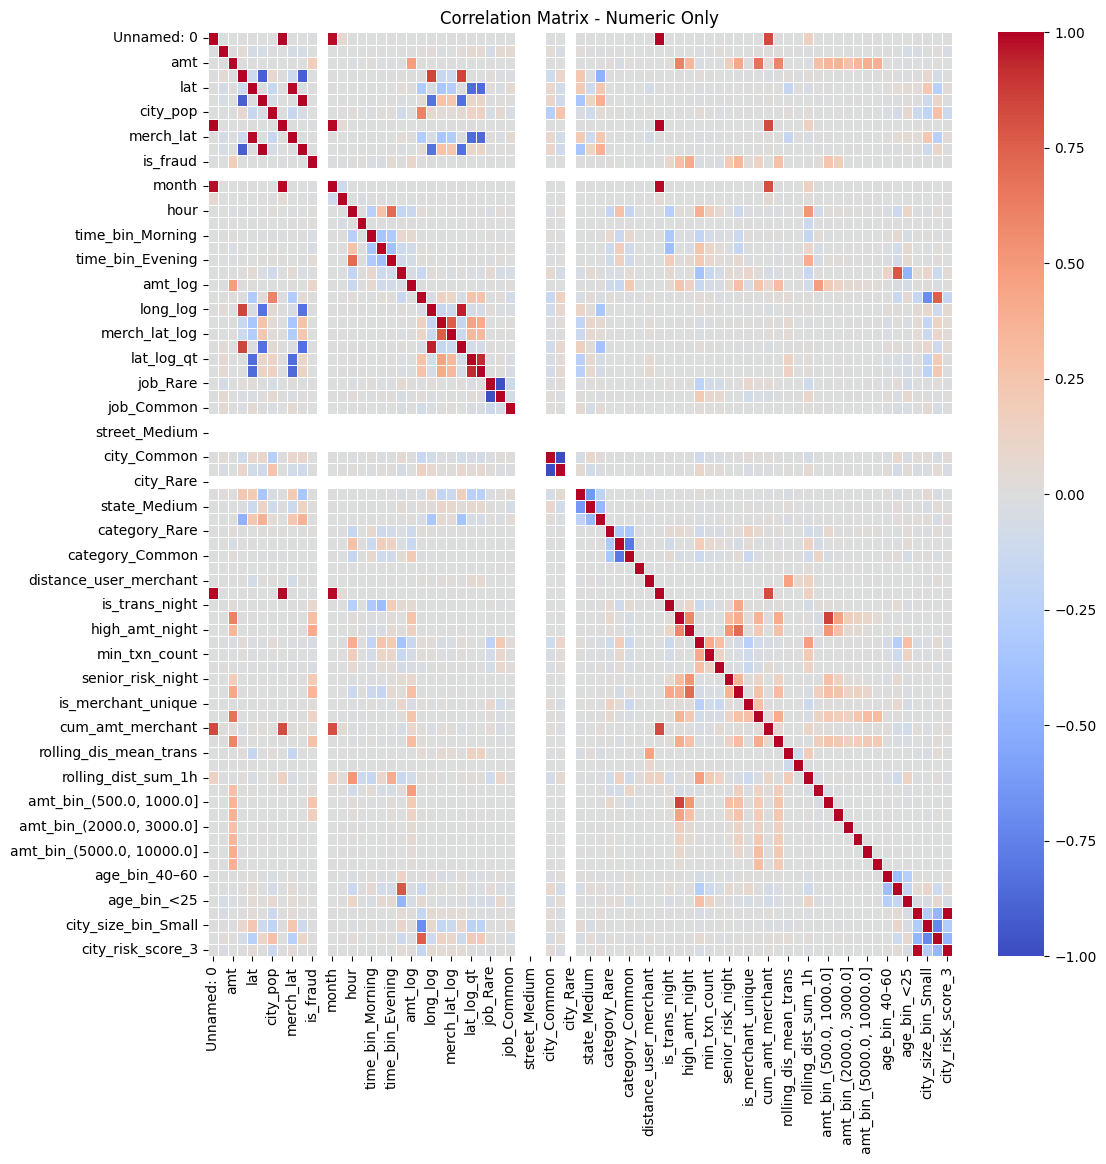

In [315]:
numeric_df = df_nontree_copy3.select_dtypes(include=['int64'])
correlation = numeric_df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(correlation, annot=False, cmap='coolwarm', linewidth=0.5)
plt.title('Correlation Matrix - Numeric Only')
plt.show()


In [316]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated columns to drop:", to_drop)

Highly correlated columns to drop: ['long', 'unix_time', 'merch_lat', 'merch_long', 'month', 'long_log', 'lat_log', 'merch_lat_log', 'merch_long_log', 'lat_log_qt', 'merch_lat_log_qt', 'job_Medium', 'city_Medium']


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


In [321]:
nhypo=df_nontree_copy3.select_dtypes(include="int64").columns.to_list()
drop=[]
for col in nhypo:
    contingency = pd.crosstab(df_nontree_copy3[col], df_nontree_copy3['is_fraud'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    if p>0.05:
        drop.append(col)
    print(f"p value for {col}:{p>0.05}:{p}")
drop

p value for Unnamed: 0:True:0.4993693095753912
p value for cc_num:False:0.0
p value for amt:False:0.0
p value for zip:False:0.0
p value for lat:False:0.0
p value for long:False:0.0
p value for city_pop:False:0.0
p value for unix_time:True:0.34113355321866634
p value for merch_lat:False:0.0
p value for merch_long:False:0.0
p value for is_fraud:False:0.0
p value for year:True:1.0
p value for month:False:5.0570050506731355e-48
p value for day:False:6.651091557269033e-35
p value for hour:False:0.0
p value for weekday:False:2.114935406445899e-25
p value for time_bin_Morning:False:3.2406139820362185e-85
p value for time_bin_AfterNoon:False:3.481373365624426e-140
p value for time_bin_Evening:False:1.930311121004605e-214
p value for age:False:0.0
p value for amt_log:False:0.0
p value for city_pop_log:False:1.130969121377059e-28
p value for long_log:False:0.021708812647160108
p value for lat_log:False:1.3690714274474695e-05
p value for merch_lat_log:False:0.009495006389752373
p value for merch_

['Unnamed: 0',
 'unix_time',
 'year',
 'job_Common',
 'street_Common',
 'street_Medium',
 'street_Rare',
 'city_Common',
 'city_Medium',
 'city_Rare',
 'state_Common',
 'state_Medium',
 'state_Rare',
 'category_Common',
 'minute',
 'distance_user_merchant',
 'rolling_dis_mean_trans',
 'dis_spike',
 'rolling_dist_sum_1h',
 'amt_bin_(2000.0, 3000.0]',
 'amt_bin_(3000.0, 5000.0]',
 'amt_bin_(5000.0, 10000.0]',
 'amt_bin_(10000.0, 20000.0]',
 'age_bin_40–60']

In [ ]:
df_nontree_copy3.isna().sum().sort_values(ascending=False).head(10)
